In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

folder_name = '/content/drive/MyDrive/plant image dataset(1)'
images = [
    "plant001_rgb.png",
    "plant002_rgb.png",
    "plant003_rgb.png",
    "plant004_rgb.png",
    "plant005_rgb.png",
    "plant006_rgb.png",
    "plant007_rgb.png",
    "plant008_rgb.png",
    "plant009_rgb.png",
    "plant010_rgb.png",
    "plant011_rgb.png",
    "plant012_rgb.png",
    "plant013_rgb.png",
    "plant014_rgb.png",
    "plant015_rgb.png",
    "plant016_rgb.png",
]



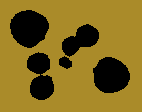

Image 1: plant001_rgb.png


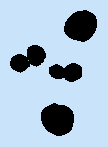

Image 2: plant002_rgb.png


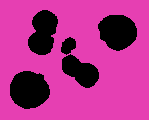

Image 3: plant003_rgb.png


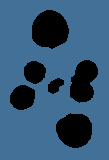

Image 4: plant004_rgb.png


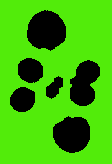

Image 5: plant005_rgb.png


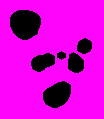

Image 6: plant006_rgb.png


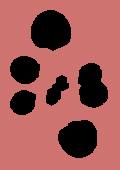

Image 7: plant007_rgb.png


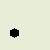

Image 8: plant008_rgb.png


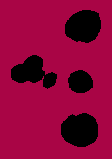

Image 9: plant009_rgb.png


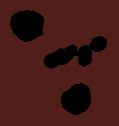

Image 10: plant010_rgb.png


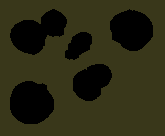

Image 11: plant011_rgb.png


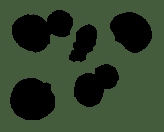

Image 12: plant012_rgb.png


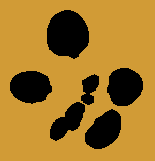

Image 13: plant013_rgb.png


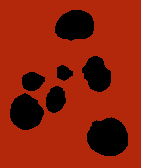

Image 14: plant014_rgb.png


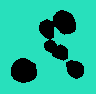

Image 15: plant015_rgb.png


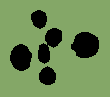

Image 16: plant016_rgb.png


In [ ]:
for i, image_name in enumerate(images, start=1):
    image_path = folder_name + '/' + image_name

    # Load the image using OpenCV
    image = cv2.imread(image_path)

    if image is not None:
        # Convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Binarize the image
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Perform morphological operations
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        dilate = cv2.dilate(binary, kernel, iterations=2)
        erode = cv2.erode(dilate, kernel, iterations=2)

        # Find connected components
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(erode, connectivity=8)

        # Create a random color map
        colormap = np.zeros((num_labels, 3), dtype=np.uint8)
        colormap[1:, :] = np.random.randint(0, 255, size=(num_labels - 1, 3))

        # Apply the color map to the labels
        labeled_img = colormap[labels]

        # Show the labeled image
        cv2_imshow(labeled_img)

        # Print the image number and the number of objects detected
        print(f"Image {i}: {image_name}")
   
    else:
        print(f"Failed to load image: {image_name}")

    # Pause for 0.5 seconds before showing the next image
    cv2.waitKey(10)

# Clear all windows
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

folder_name = "/content/drive/MyDrive/plant image dataset(1)"  # specify the path to the folder containing the images

for i in range(1, 17):
    # read the input image
    image_file = folder_name + "/plant" + str(i).zfill(3) + "_rgb.png"
    print(f"Processing image {i}...")
    print("Image file:", image_file)

    input_image = cv2.imread(image_file)

    if input_image is None:
        print(f"Failed to load image: {image_file}")
        continue

    # resize the image to 512x512
    input_image = cv2.resize(input_image, (512, 512))

    # convert the image to double and extract the green channel
    input_image = input_image.astype(float) / 255.0
    green_channel = input_image[:, :, 1]

    # binarize the image using a threshold
    _, bw = cv2.threshold(green_channel, 0.5, 1, cv2.THRESH_BINARY)

    # perform erosion to dilate the image
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
    im_hsv_dilute = cv2.erode(bw, se)

    # perform dilation to obtain the segmented image
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    image_seg = cv2.dilate(im_hsv_dilute, se)

    # find connected components with statistics
    _, labels, stats, _ = cv2.connectedComponentsWithStats(image_seg.astype(np.uint8))

    # calculate the number of leaves excluding the background component
    num_leaves = len(stats) - 1

    # display the input image and segmented image
    cv2_imshow(cv2.convertScaleAbs(input_image * 255.0))
    cv2_imshow(cv2.convertScaleAbs(image_seg * 255.0))

    
    # pause for 4 seconds before processing the next image
    cv2.waitKey(4000)
    cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.